In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# STEP 1 Initialization:
# 隨機產生出一組合法解 (至多2的100次方種可能解)

def ramdomSolution():
    # 隨機生成 100 bits 0/1 長度
    string_status = [ random.randint(0,1) for _ in range(n)]
    currentValue = 0
    
    for i in range(n):
        if(string_status[i] == 1):
            currentValue += 1
            
    return string_status, currentValue
# n=100
# ramdomSolution()

In [3]:
# STEP 2 Transition: 產生一個或多個解 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

# STEP 3 Evaluation: 評估一個或多個解 適應值(Objective value)大小

def getNeighbor(solution, value):
    
    neightbor_sol = solution.copy()
    neighbor_value = value

    """
    # 採左右移動 (1)使解往左走+1或往右走-1 0001->0010 or 0001->0000
    # 採左移 +1
    # 二進位左移 +1 ，超過歸 bit數 0 (ex: [1, 1, 1, 1] +1 -> [0, 0, 0, 0])
    for i in range(n-1,-1,-1):
        if(neightbor_sol[i] == 0):
            neightbor_sol[i] = 1
            neighbor_value += 1
            break
        else:
            neightbor_sol[i] = 0
            neighbor_value -= 1
    
    """
    # 採隨機移動 (2)隨機找其中一個 bit 0換成 1 1換成 0 
        
    i = random.randint(0,n-1)

    # 多一個 1 
    if(neightbor_sol[i] == 0):

        neightbor_sol[i]=1
        neighbor_value += 1

    # 少一個 1 
    else: 
        neightbor_sol[i] = 0
        neighbor_value -= 1
 
    return neightbor_sol, neighbor_value
    
# n=4
# getNeighbor([0,1,1,0],2)


In [4]:
# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較
# 退火環節:
# 使用退火溫度(T)和適應值的差值(Δf)計算出允許機率，接著隨機一個0–1的浮點數(r)，若該隨機值(r)≤允許機率則進行更新

def simulatedAnnealing(current_sol, currrent_value):
    
    avg_val = 0
    total_val = 0
    
    for i in range(run):
        neightbor_sol, neighbor_value = getNeighbor(current_sol, currrent_value)
        #print("\n鄰近解: " + str(neightbor_sol))
        #print("鄰近解獲利: " + str(neighbor_value))

        # 鄰近解若優於或等於先前解則更新
        if(currrent_value <= neighbor_value):

            current_sol = neightbor_sol
            currrent_value = neighbor_value

        # 若差於先前解則進行退火環節
        else:

            # 隨機值(r:0~1的浮點數)
            r = random.random()

            # Δf < 0 ，故找最大值為: 鄰近解 - 先前解
            Δf = (neighbor_value - currrent_value)
            accept_p = np.exp( (neighbor_value - currrent_value) / current_temperature )

            #print("r,accept_p,Δf")
            #print(r,accept_p,Δf)

            # 隨機值(r:0~1的浮點數) ≤ 允許機率則接受差值進行更新
            # e的指數若是一個很小的負值，計算後的值會較接近1，差值較小的情形能有比較大的機率接受更新 
            if(r <= accept_p):
                current_sol = neightbor_sol
                currrent_value = neighbor_value
                #print("接受差值")
        
        total_val += currrent_value
    
    #跑51次平均值
    avg_val = total_val / run
    
    return current_sol, currrent_value, avg_val
    

In [5]:
# main code

# STEP 0 Setting: 初始參數:

global n,iteration,run,current_temperature,Rₜ; 

# 100 bits
n = 100 
print("bit 數:",n)

# 迭代次數(Iteration)
iteration = 1000

# 平均迭代1次 run 次數
run = 51

# 初始溫度(T) 退火溫度
current_temperature = 5.0

# 退火係數(Rₜ)
Rₜ = 0.95

# STEP 1 Initial:
# 隨機產生出一組合法解 

#測試最差初始解
# current_sol = np.zeros(n)
# currrent_value = 0

current_sol, currrent_value = ramdomSolution()
print("\n初始解: " + str(current_sol))
print("初始解值: " + str(currrent_value))

value_history = []

# 迭代 1000 次停止
for k in range(iteration):
    
    current_sol, currrent_value, avg_val = simulatedAnnealing(current_sol, currrent_value)
  
    # 每次迭代的最後皆需進行降溫動作(T = T * Rₜ)，會將溫度T乘上一個小於1的數值(Rₜ)，Rₜ的數值大小取決於想要的收斂速度
    # T (T = T * Rₜ) 會隨著迭代的進行而越來越小，從初始值1開始，隨著迭代不斷下降
    # Δf( Δf = 鄰近解 - 先前解) 除上一個小於1的值(T)，會將 Δf 的值放大，變成一個更大的負數
    # e的指數若是一個很大的負值，計算後的值會很接近 0，成功更新的機率變得更低
    current_temperature = current_temperature * Rₜ
    
    # 紀錄每次迭代的平均值
    value_history.append(avg_val)
    
    print("\n第" + str(k+1) + "輪: ")
    print("解: " + str(current_sol))
    print("解值: " + str(currrent_value))
    print("平均解值: " + str(avg_val))

print("\n最佳解: " + str(current_sol))
print("最佳值: " + str(currrent_value))
    


bit 數: 100

初始解: [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
初始解值: 54

第1輪: 
解: [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
解值: 51
平均解值: 55.35294117647059

第2輪: 
解: [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
解值: 50
平均解值: 51.4313

第614輪: 
解: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
解值: 100
平均解值: 100.0

第615輪: 
解: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
解值: 100
平均解值: 100.0

第616輪: 
解: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
解值: 100
平均解值: 100.0

第

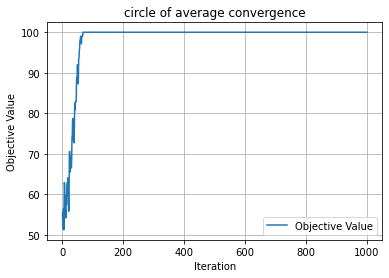

最佳解:  100
平均最佳解:  100.0


In [6]:
def plotIteration(value_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of average convergence')
    plt.plot(range(1, iterationTime + 1), value_history, label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.grid()
    plt.show()
    
# 畫平均收斂圖
plotIteration(value_history, iteration)
print("最佳解: ", currrent_value)
print("平均最佳解: ", max(value_history))